## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

/Users/tanzinazaman/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_df.loc[:, 'Number of Discharges'] = clean_df['Number of Discharges'].astype(int)
clean_df = clean_df.sort('Number of Discharges')

/Users/tanzinazaman/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/tanzinazaman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


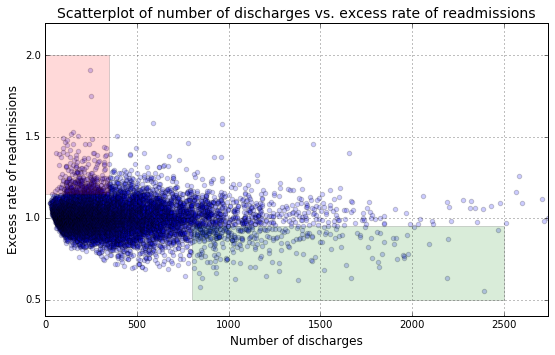

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_df['Number of Discharges'][81:-3]]
y = list(clean_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [24]:
# The labels of attributes 
hosp_main = hospital_read_df
list(hosp_main.columns.values)

['Hospital Name',
 'Provider Number',
 'State',
 'Measure Name',
 'Number of Discharges',
 'Footnote',
 'Excess Readmission Ratio',
 'Predicted Readmission Rate',
 'Expected Readmission Rate',
 'Number of Readmissions',
 'Start Date',
 'End Date']

# A. Do you agree with the above analysis and recommendations? Why or why not?

The scatter plot of excess readmission rate and number of discharges is not clear enough to make an opinion. It seems that the excess readmission rate has been kept steady no matter number of discharges increases or decreases. But it is evident from the scatter plot that, there are significantly more incident for lower discharge than the greater.  
The right skewed distribution of the number of discharge supports this observation.

In [5]:
discharge_100 = clean_df[100 > clean_df['Number of Discharges']]
discharge_1000 = clean_df[clean_df['Number of Discharges'] > 1000]

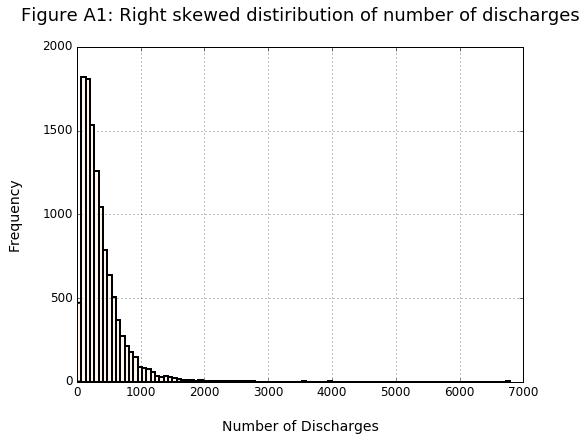

In [23]:
plot_1 = clean_df['Number of Discharges'].plot(kind ='hist',lw = 2,fontsize = 12,bins=100,grid=True,
                                               figsize = (8,6), colormap = 'Oranges')
plot_1.set_xlabel('\nNumber of Discharges',fontsize = 14 )
plot_1.set_ylabel('Frequency\n',fontsize = 14 )
plot_1.set_title('Figure A1: Right skewed distiribution of number of discharges\n',fontsize = 18)

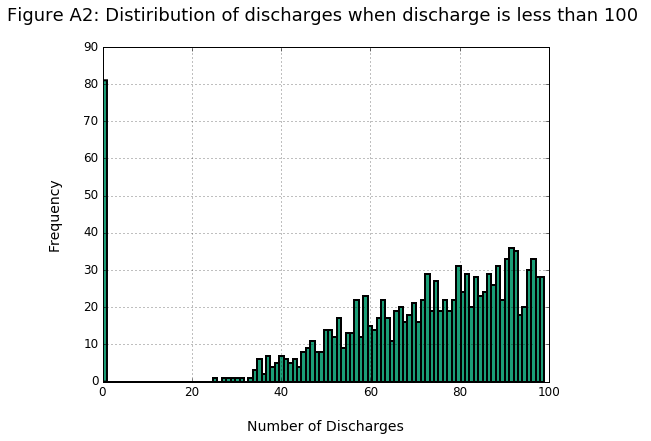

In [22]:
plot_2 = discharge_100['Number of Discharges'].plot(kind = 'hist',lw = 2,fontsize = 12,bins=100,
                                   grid=True,figsize = (8,6), colormap = 'Dark2')
plot_2.set_xlabel('\nNumber of Discharges',fontsize = 14 )
plot_2.set_ylabel('Frequency\n',fontsize = 14 )
plot_2.set_title('Figure A2: Distiribution of discharges when discharge is less than 100 \n',fontsize = 18)

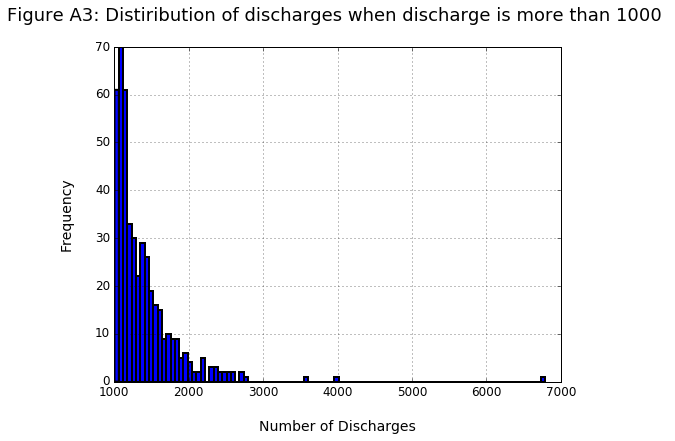

In [21]:
plot_3 = discharge_1000['Number of Discharges'].plot(kind = 'hist',lw = 2,fontsize = 12,bins=100,
                                   grid=True,figsize = (8,6))
plot_3.set_xlabel('\nNumber of Discharges',fontsize = 14 )
plot_3.set_ylabel('Frequency\n',fontsize = 14 )
plot_3.set_title('Figure A3: Distiribution of discharges when discharge is more than 1000 \n',fontsize = 18)

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

B1: Setup an appropriate hypothesis test.
B2: Compute and report the observed significance value (or p-value).
B3: Report statistical significance for α = .01.
B4: Discuss statistical significance and practical significance

In [19]:
# Data frame with 'Number of Discharges' and 'Excess Readmission Ratio',
feature = ['Number of Discharges','Excess Readmission Ratio',]
reduced_df  = clean_df.loc[:,(feature)]

# Getting rid of 0 discharges
reduced_df = reduced_df[reduced_df['Number of Discharges'] != 0]

# Seperate the dataset at the median to give dfch for high Number of Discharges and dfcl for low Number of Discharges

median = np.median(reduced_df['Number of Discharges'])
reduced_df_high = reduced_df[reduced_df['Number of Discharges'] > median]
highsample_nod = list(reduced_df_high['Excess Readmission Ratio'])
reduced_df_low = reduced_df[reduced_df['Number of Discharges'] <= median]
lowsample_nod = list(reduced_df_low['Excess Readmission Ratio'])

In [20]:
# Calculate the sample sizes for high and low number of discharges
n_high = len(highsample_nod)
n_low = len(lowsample_nod)

# Calculate the means, standard deviations, and the difference of means between our two normally distributed samples
highsample_mean = np.mean(highsample_nod)
lowsample_mean = np.mean(lowsample_nod)

diffmean_samp = abs(lowsample_mean - highsample_mean)

highsample_std = np.std(highsample_nod)
lowsample_std = np.std(lowsample_nod)

# Find the standard error
se_samp = np.sqrt((highsample_std / n_high) + (lowsample_std / n_low))

# Find the p-value
p_value = 2 * stats.norm.cdf(0, diffmean_samp, se_samp)

print "The P-Value is ", p_value

The P-Value is  0.0114478596984


Since the P-Value is higher than the significance level, it can be stated that the null hypothesis of equal readmission rates between high and low capacity hospitals is acceptable.